**Requires output_attr_stats.csv.**  

**Requires unique_people.txt, commissioner_dict.json, cra_dict.json, government_idx_list.txt, generated by "identify cra, commissioner, and gov people.ipyhnb"**

**Generate top 200 email extensions.csv**

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_csv('output_attr_stats.csv')
from_list = df['From'].values.tolist()
to_list = df['To'].values.tolist()
cc_list = df['CC'].values.tolist()
length = len(df)

# cra/commisioners and gov are known

In [6]:
with open('unique_people.txt', encoding = 'utf-8') as f:
    unique_people = f.read().splitlines()

In [7]:
# cra and comm
with open('commissioner_dict.json', 'r') as f:
    commissioner_dict = json.load(f)
with open('cra_dict.json', 'r') as f:
    cra_dict = json.load(f)
cra_list = []
for v in cra_dict.values():
    cra_list += v
commissioner_list = []
for v in commissioner_dict.values():
    commissioner_list += v
cra_comm_list = cra_list + commissioner_list

In [8]:
cra_comm_idx_list = []
for i,people in enumerate(unique_people):
    if people in cra_comm_list:
        cra_comm_idx_list.append(i)

In [9]:
with open('government_idx_list.txt') as f:
    government_idx_list = list(map(int,f.read().splitlines()))

In [10]:
re_extension = re.compile('\@([0-9a-z\.]+)')
re_email = re.compile('([0-9a-z\.\_]+\@[0-9a-z\.]+)')

In [16]:
people

'@comcast.net'

In [19]:
email = re_email.findall(people)
email
re_extension.findall(people)[0]

'comcast.net'

In [20]:
extension_dic = {}
for i,people in enumerate(unique_people):
    if i not in government_idx_list and i not in cra_comm_idx_list:
        if '@' in people: # if it's an email
            if people.count('@') == 1: # in case more than one emails are found
                try:
                    extension = re_extension.findall(people)[0]
                    # email might be empty, e.g. '@comcast.net'
                    email = re_email.findall(people)[0]
                    if extension not in extension_dic:
                        extension_dic[extension] = []
                    extension_dic[extension].append(email)
                except:
                    print('might be OCR error:', people[2])

might be OCR error: o
might be OCR error: l
might be OCR error: l
might be OCR error: a
might be OCR error: o
might be OCR error: w
might be OCR error: n
might be OCR error: z


In [14]:
# before gordon's update people as email/name
# people is a tuple of (firstname, lastname, email)

# extension_dic = {}
# for i,people in enumerate(unique_people):
#     if i not in government_idx_list and i not in cra_comm_idx_list:
#         if '@' in people[2]:
#             if people[2].count('@') == 1:
#                 try:
#                     extension = re_extension.findall(people[2].replace(' ', ''))[0]
#                     email = re_email.findall(people[2].replace(' ', ''))[0]
#                     if extension not in extension_dic:
#                         extension_dic[extension] = []

#                     extension_dic[extension].append(email)
#                 except:
#                     print('might be OCR error:', people[2])

# save into excel

In [23]:
# remove duplicates
for k,v in extension_dic.items():
    extension_dic[k] = list(set(v))

In [24]:
# sort by num of email addresses
sorted_extension_groups = sorted(extension_dic.items(), key = lambda x:len(x[1]), reverse=True)

In [25]:
extensions = []
lengths = []
for g in sorted_extension_groups:
    extensions.append(g[0])
    lengths.append(len(g[1]))


In [26]:
df = pd.DataFrame()
df['index'] = np.arange(lengths[0])
df[extensions[0]] = extension_dic[extensions[0]]
for i in range(1, 200):
    df_temp = pd.DataFrame()
    df_temp['index'] = np.arange(lengths[i])
    df_temp[extensions[i]] = extension_dic[extensions[i]]
    df = df.merge(df_temp, how ='left')

In [27]:
df = df.fillna('')
df

,index,gmail.com,yahoo.com,comcast.net,aol.com,hotmail.com,embarqmail.com,fsu.edu,famu.edu,earthlink.net,...,fightinghunger.org,bmolaw.com,theoasiscenter.net,tasconline.com,fbmc.com,southern,americanaudiovisual.com,chemringordnance.com,fmbbank.com,myfuelmaster.com
0,0,vickie.machado@gmail.com,bahamawindrider@yahoo.com,springhillminister@comcast.net,rgreen2505@aol.com,jenniferr.hill@hotmail.com,awise31@embarqmail.com,jmiler@fsu.edu,kenya.washingtonjohnson@famu.edu,tallysfinest@earthlink.net,...,spiotrowski@fightinghunger.org,george@bmolaw.com,kristin.shelton@theoasiscenter.net,customerfeedback@tasconline.com,cwilliams@fbmc.com,frgre@southern,jazzarito@americanaudiovisual.com,dkrejcar@chemringordnance.com,dwhitaker@fmbbank.com,shane.smith@myfuelmaster.com
1,1,jennifermheckman@gmail.com,raynorpainting@yahoo.com,rgshivers@comcast.net,g2case@aol.com,missycode@hotmail.com,jamesmunro@embarqmail.com,mcn04@fsu.edu,rhonda.miller@famu.edu,stephenhodges@earthlink.net,...,marydekle@fightinghunger.org,rhanna@bmolaw.com,haley.cutler@theoasiscenter.net,notification@tasconline.com,makanbi@fbmc.com,fakha@southern,john@americanaudiovisual.com,kfunkhouser@chemringordnance.com,slester@fmbbank.com,shane.smoth@myfuelmaster.com
2,2,marilynngriffith@gmail.com,wilsonrandolph79@yahoo.com,calberti@comcast.net,ascanameo@aol.com,jenbirk2011@hotmail.com,themurman@embarqmail.com,mmay@fsu.edu,stephen.leong@famu.edu,alphageotech@earthlink.net,...,cphoenix@fightinghunger.org,fralston@bmolaw.com,reilly.clemens@theoasiscenter.net,tasc_service@tasconline.com,mhsheridan@fbmc.com,thnoe@southern,jdamron@americanaudiovisual.com,gibave@chemringordnance.com,idonkin@fmbbank.com,jordan.fletcher@myfuelmaster.com
3,3,seanmlawler87@gmail.com,lilysnowden@yahoo.com,shirleypittman@comcast.net,nssmd@aol.com,ericsnover@hotmail.com,thompsal@embarqmail.com,pkeating@fsu.edu,richard.givens@famu.edu,bchc710@earthlink.net,...,rickminor@fightinghunger.org,fspringer@bmolaw.com,intern@theoasiscenter.net,service@tasconline.com,tneely@fbmc.com,wabat@southern,david@americanaudiovisual.com,fadams@chemringordnance.com,dmay@fmbbank.com,doug.dunlap@myfuelmaster.com
4,4,sbhansen100@gmail.com,hooker1953@yahoo.com,mskovera@comcast.net,lipika1@aol.com,cpewing@hotmail.com,hhudson@embarqmail.com,lweingarden@fsu.edu,robert.carroll@famu.edu,jbtoo1@earthlink.net,...,croteau@fightinghunger.org,croth@bmolaw.com,cswgstaff@theoasiscenter.net,tasc@tasconline.com,dfaulkenberry@fbmc.com,dasmi@southern,ddamron@americanaudiovisual.com,dpride@chemringordnance.com,rmcneill@fmbbank.com,sara.dunlap@myfuelmaster.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,1718,larrysimmonsconsulting@gmail.com,,,,,,,,,...,,,,,,,,,,
1719,1719,benprice.itools@gmail.com,,,,,,,,,...,,,,,,,,,,
1720,1720,larabolte@gmail.com,,,,,,,,,...,,,,,,,,,,
1721,1721,jwmjrbiz@gmail.com,,,,,,,,,...,,,,,,,,,,


In [28]:
df.to_csv('top 200 email extensions 2.csv')

# plot

In [29]:
sum(lengths)

12712

In [30]:
lengths[0]

1723

In [31]:
len(extensions)

3724

In [32]:
sum(np.array(lengths) > 1)

1121

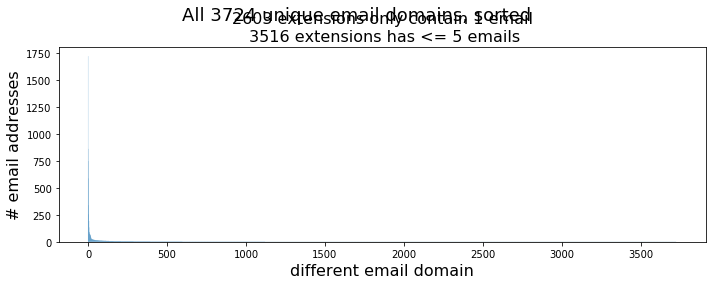

In [33]:
x = np.arange(len(extensions))
plt.figure(figsize = (10,4))
plt.bar(x, lengths, width=1, snap=False)
plt.suptitle(f'All {len(extensions)} unique email domains, sorted', fontsize = 18)
plt.title(f'{sum(np.array(lengths) == 1)} extensions only contain 1 email\n {sum(np.array(lengths) <= 5)} extensions has <= 5 emails', fontsize = 16)
plt.xlabel('different email domain', fontsize = 16)
plt.ylabel('# email addresses', fontsize = 16)
plt.tight_layout()
plt.show()

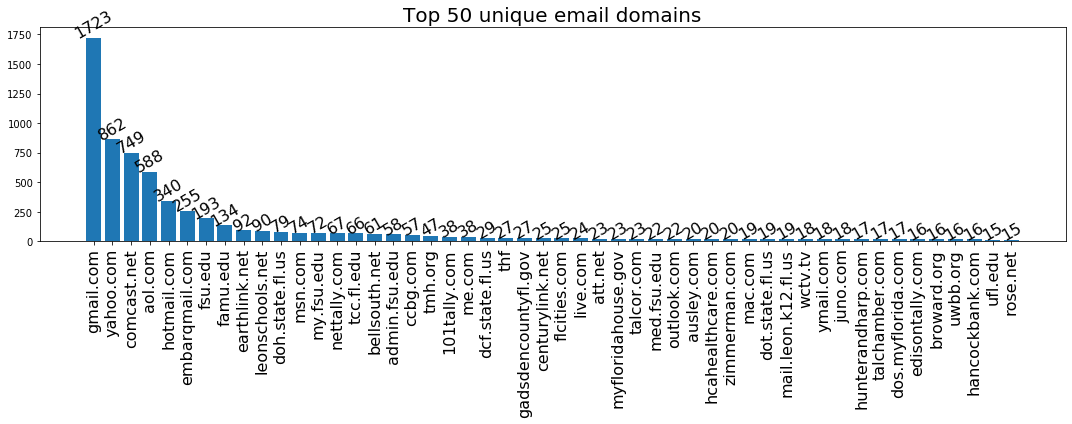

In [34]:
top_n = 50
x = np.arange(top_n)
plt.figure(figsize = (15,6))
plt.bar(x,lengths[:top_n])
plt.xticks(ticks = x, labels=extensions[:top_n], rotation = 90, fontsize = 16)
for i in range(top_n):
    plt.annotate(lengths[i], (x[i],lengths[i]), ha='center', fontsize = 16, rotation = 30)
plt.title(f'Top {top_n} unique email domains', fontsize = 20)
plt.tight_layout()
plt.show()